# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
Tot_No_of_cities = len(cities)
print(Tot_No_of_cities)


621


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [87]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

cityCounter = 0
loopCounter = 1

print("Beginning Data Retrieval")
print("-----------------------------")
               
for city in cities:
   
      
    response = requests.get(query_url + city).json()
    #pprint(response) 

    try:
        pprint(f"Processing Record of {cityCounter} of Set {loopCounter} | {city}")
        i=i+1
        City.append(response["name"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])            
     
    except:            
        pprint(f"City not found. Skipping... ")
    
    #incrementing the city counter by 1
    cityCounter += 1
    
    #Resetting the city counter and incrementing the set counter
    if cityCounter == 50:
        cityCounter = 0
        loopCounter += 1
    
print("-----------------------------")                
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
'Processing Record of 0 of Set 1 | santiago de cao'
'Processing Record of 1 of Set 1 | atuona'
'Processing Record of 2 of Set 1 | prieska'
'Processing Record of 3 of Set 1 | busselton'
'Processing Record of 4 of Set 1 | jamestown'
'Processing Record of 5 of Set 1 | rikitea'
'Processing Record of 6 of Set 1 | saleaula'
'City not found. Skipping... '
'Processing Record of 7 of Set 1 | srednekolymsk'
'Processing Record of 8 of Set 1 | vanimo'
'Processing Record of 9 of Set 1 | cape town'
'Processing Record of 10 of Set 1 | sangar'
'Processing Record of 11 of Set 1 | ospitaletto'
'Processing Record of 12 of Set 1 | cidreira'
'Processing Record of 13 of Set 1 | beringovskiy'
'Processing Record of 14 of Set 1 | luanda'
'Processing Record of 15 of Set 1 | beira'
'Processing Record of 16 of Set 1 | punta arenas'
'Processing Record of 17 of Set 1 | tsabong'
'Processing Record of 18 of Set 1 | solikamsk'
'Processing Record of 19 of Set 1 | l

'Processing Record of 11 of Set 4 | cherskiy'
'Processing Record of 12 of Set 4 | catamarca'
'Processing Record of 13 of Set 4 | provideniya'
'Processing Record of 14 of Set 4 | barbar'
'City not found. Skipping... '
'Processing Record of 15 of Set 4 | port augusta'
'Processing Record of 16 of Set 4 | carnarvon'
'Processing Record of 17 of Set 4 | miandoab'
'Processing Record of 18 of Set 4 | kamenskoye'
'City not found. Skipping... '
'Processing Record of 19 of Set 4 | mata'
'Processing Record of 20 of Set 4 | cap malheureux'
'Processing Record of 21 of Set 4 | chegdomyn'
'Processing Record of 22 of Set 4 | avera'
'Processing Record of 23 of Set 4 | san isidro'
'Processing Record of 24 of Set 4 | sol-iletsk'
'Processing Record of 25 of Set 4 | houma'
'Processing Record of 26 of Set 4 | kapaa'
'Processing Record of 27 of Set 4 | muros'
'Processing Record of 28 of Set 4 | hobart'
'Processing Record of 29 of Set 4 | manicore'
'Processing Record of 30 of Set 4 | tsihombe'
'City not found.

'Processing Record of 31 of Set 7 | taksimo'
'Processing Record of 32 of Set 7 | lorengau'
'Processing Record of 33 of Set 7 | kiknur'
'Processing Record of 34 of Set 7 | otjimbingwe'
'Processing Record of 35 of Set 7 | geraldton'
'Processing Record of 36 of Set 7 | padang'
'Processing Record of 37 of Set 7 | saint-georges'
'Processing Record of 38 of Set 7 | letlhakeng'
'Processing Record of 39 of Set 7 | voh'
'Processing Record of 40 of Set 7 | kargasok'
'Processing Record of 41 of Set 7 | poum'
'Processing Record of 42 of Set 7 | nizhnekamsk'
'Processing Record of 43 of Set 7 | minggang'
'Processing Record of 44 of Set 7 | haibowan'
'City not found. Skipping... '
'Processing Record of 45 of Set 7 | luderitz'
'Processing Record of 46 of Set 7 | oum hadjer'
'Processing Record of 47 of Set 7 | shawnee'
'Processing Record of 48 of Set 7 | verkhoyansk'
'Processing Record of 49 of Set 7 | simojovel'
'Processing Record of 0 of Set 8 | marawi'
'Processing Record of 1 of Set 8 | lavrentiya'


'Processing Record of 3 of Set 11 | hinton'
'Processing Record of 4 of Set 11 | bambanglipuro'
'Processing Record of 5 of Set 11 | inongo'
'Processing Record of 6 of Set 11 | barra patuca'
'Processing Record of 7 of Set 11 | ust-nera'
'Processing Record of 8 of Set 11 | sao filipe'
'Processing Record of 9 of Set 11 | miranorte'
'City not found. Skipping... '
'Processing Record of 10 of Set 11 | mazagao'
'Processing Record of 11 of Set 11 | nome'
'Processing Record of 12 of Set 11 | bandiagara'
'Processing Record of 13 of Set 11 | japura'
'Processing Record of 14 of Set 11 | gonzales'
'Processing Record of 15 of Set 11 | formosa do rio preto'
'Processing Record of 16 of Set 11 | maningrida'
'Processing Record of 17 of Set 11 | tommot'
'Processing Record of 18 of Set 11 | rybnoye'
'Processing Record of 19 of Set 11 | wangaratta'
'Processing Record of 20 of Set 11 | lasa'
'Processing Record of 21 of Set 11 | ishigaki'
'Processing Record of 22 of Set 11 | batagay'
'Processing Record of 23 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [88]:
# Convert to DataFrame
weather_dict = {
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date
}
weather_checkDF = pd.DataFrame(weather_dict)
weather_checkDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santiago de Cao,-7.9589,-79.2392,62.73,82,100,10.36,PE,1658608806
1,Atuona,-9.8000,-139.0333,77.54,77,35,19.10,PF,1658608575
2,Prieska,-29.6641,22.7474,49.10,66,0,12.91,ZA,1658608806
3,Busselton,-33.6500,115.3333,51.30,66,79,14.20,AU,1658608806
4,Jamestown,42.0970,-79.2353,80.51,65,75,18.41,US,1658608807


In [89]:
#weather_checkDF.to_csv("output_data/weatherdata.csv", index = False)
weather_checkDF.to_csv(output_data_file)
weather_checkDF.head(5)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santiago de Cao,-7.9589,-79.2392,62.73,82,100,10.36,PE,1658608806
1,Atuona,-9.8000,-139.0333,77.54,77,35,19.10,PF,1658608575
2,Prieska,-29.6641,22.7474,49.10,66,0,12.91,ZA,1658608806
3,Busselton,-33.6500,115.3333,51.30,66,79,14.20,AU,1658608806
4,Jamestown,42.0970,-79.2353,80.51,65,75,18.41,US,1658608807


In [90]:
weather_checkDF.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [84]:
#weather_checkDF = pd.read_csv(output_data_file)
#weather_checkDF.head(10)

In [95]:
weather_checkDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,20.319880,17.779485,69.487364,70.720562,56.163445,7.484675,1.658609e+09
std,33.717296,90.498963,14.891867,21.285723,39.327485,5.131754,8.206150e+01
min,-54.800000,-175.200000,30.160000,9.000000,0.000000,0.000000,1.658609e+09
25%,-8.257800,-65.038500,58.690000,59.000000,13.000000,3.670000,1.658609e+09
50%,24.266700,22.747400,70.650000,76.000000,67.000000,6.330000,1.658609e+09
75%,49.981100,96.733300,80.560000,87.000000,98.000000,9.780000,1.658609e+09
max,78.218600,179.316700,108.450000,100.000000,100.000000,28.770000,1.658609e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [99]:
#Check if max of Humidity > 100
if weather_checkDF["Humidity"].max() > 100:
    Humidity_revisedData = weather_checkDF.loc[weather_checkDF["Humidity"] <= 100]
    Humidity_revisedData.describe()
    

In [100]:
#  Get the indices of cities that have humidity over 100%
Humidity100_index = weather_checkDF.index[weather_checkDF["Humidity"] > 100]
Humidity100_index

Int64Index([], dtype='int64')

In [102]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_checkDF.drop(Humidity100_index, inplace=False )
clean_city_data.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santiago de Cao,-7.9589,-79.2392,62.73,82,100,10.36,PE,1658608806
1,Atuona,-9.8000,-139.0333,77.54,77,35,19.10,PF,1658608575
2,Prieska,-29.6641,22.7474,49.10,66,0,12.91,ZA,1658608806
3,Busselton,-33.6500,115.3333,51.30,66,79,14.20,AU,1658608806
4,Jamestown,42.0970,-79.2353,80.51,65,75,18.41,US,1658608807


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

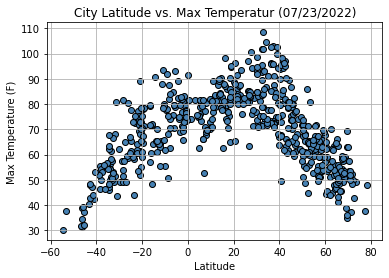

In [103]:
# Scatter plat of Latitude vs. Temperature
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], facecolor='steelblue', edgecolor='black')

#today's date
today = pd.to_datetime("today").strftime("%m/%d/%Y")

plt.title(f"City Latitude vs. Max Temperatur ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(which='major', linestyle='-')

#saving the scatter plot to a .png file
plt.savefig("output_data/LatVsTemp_scatter_plot.png")
plt.show()

## Latitude vs. Humidity Plot

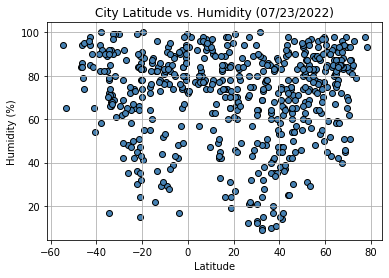

In [104]:
# Scatter plat of Latitude vs. Humidity
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], facecolor='steelblue', edgecolor='black')

#today's date
today = pd.to_datetime("today").strftime("%m/%d/%Y")

plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(which='major', linestyle='-')

#saving the scatter plot to a .png file
plt.savefig("output_data/LatVsHumidity_scatter_plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

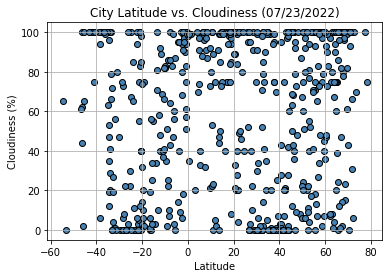

In [105]:
# Scatter plat of Latitude vs. Cloudiness
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], facecolor='steelblue', edgecolor='black')

#today's date
today = pd.to_datetime("today").strftime("%m/%d/%Y")

plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(which='major', linestyle='-')

#saving the scatter plot to a .png file
plt.savefig("output_data/LatVsCloudiness_scatter_plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

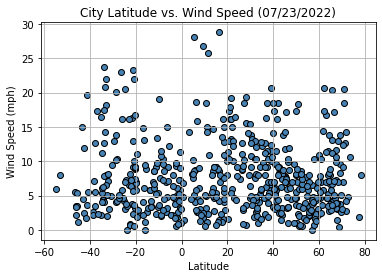

In [106]:
# Scatter plat of Latitude vs. Wind Speed
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], facecolor='steelblue', edgecolor='black')

#today's date
today = pd.to_datetime("today").strftime("%m/%d/%Y")

plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(which='major', linestyle='-')

#saving the scatter plot to a .png file
plt.savefig("output_data/LatVsWindSpeed_scatter_plot.png")
plt.show()

## Linear Regression

In [107]:
#create DataFrames for Northern and Southern Hemisphere
Northern_Hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
Southern_Hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

In [108]:
# Create a function for linear regression and scatter plot

def linear_regression(x,y):
    #Calculate r-value
    correlation = st.pearsonr(x,y)
    print(f"The r-value is: {correlation[0]}")

    # Add the linear regression equation and line to plot

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    
    return line_equation

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6608174229571051


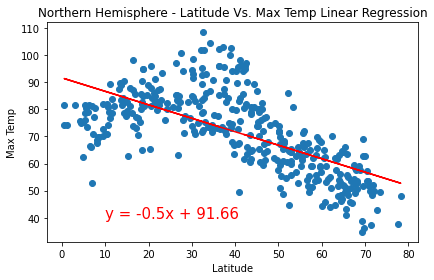

In [109]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Latitude Vs. Max Temp Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("output_data/North_LatVsMaxTemp_regression_plot.png")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7806312241243981


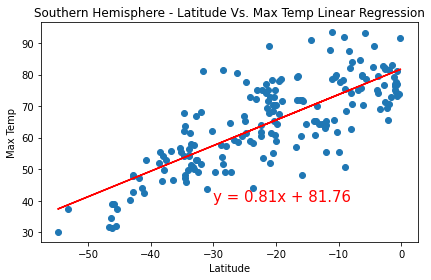

In [119]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude Vs. Max Temp Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("output_data/South_LatVsMaxTemp_regression_plot.png")
plt.tight_layout()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10858715194743812


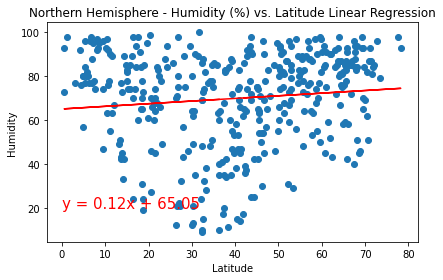

In [111]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("output_data/North_LatVsHumidity_regression_plot.png")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.11437999696155124


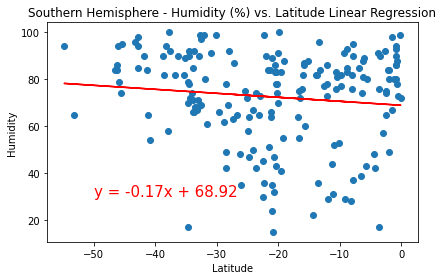

In [120]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("output_data/South_LatVsHumidity_regression_plot.png")
plt.tight_layout()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.03293245555966931


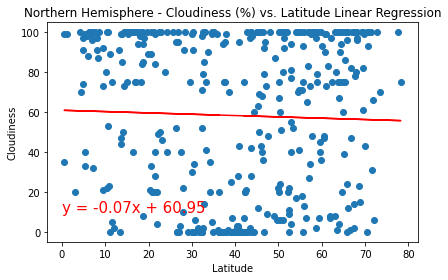

In [121]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("output_data/North_LatVsCloudiness_regression_plot.png")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04700578876280467


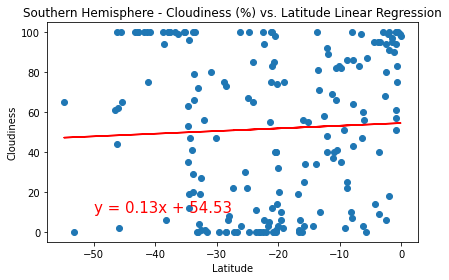

In [122]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("output_data/South_LatVsCloudiness_regression_plot.png")
plt.tight_layout()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12001927766723414


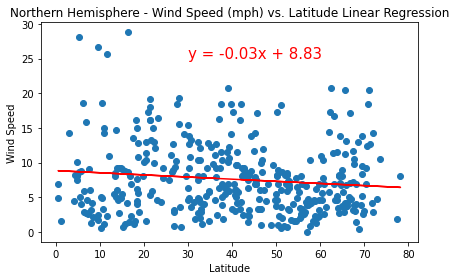

In [118]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("output_data/North_LatVsWindSpeed_regression_plot.png")
plt.tight_layout()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14249434562727012


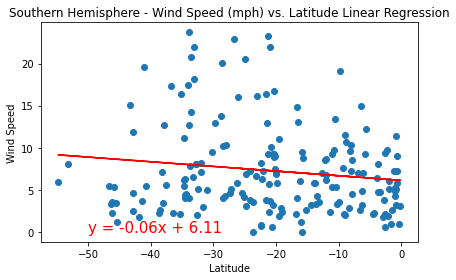

In [116]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed"]

#Calling linear_regression function
line_eq = linear_regression(x_values, y_values)

plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("output_data/South_LatVsWindSpeed_regression_plot.png")
plt.tight_layout()
plt.show()